In [12]:
import pandas as pd
import numpy as np
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt
import openml
#our neural network
from neuralnetwork import Network,FCLayer,ActivationLayer,sigmoid,sigmoid_prime,tanh,tanh_prime,categorical_cross_entropy,categorical_cross_entropy_prime,mse,mse_prime,binary_cross_entropy,binary_cross_entropy_prime,relu,relu_prime

#sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import recall_score,accuracy_score,confusion_matrix, ConfusionMatrixDisplay, precision_score, make_scorer

# from sklearn.model_selection import GridSearchCV,KFold,cross_val_score
import itertools

from neuralnetwork import Network,FCLayer,ActivationLayer
from neuralnetwork import sigmoid,sigmoid_prime,tanh,tanh_prime,categorical_cross_entropy,categorical_cross_entropy_prime,mse,mse_prime,softmax,softmax_prime


In [13]:
cols = ['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
        'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

df_wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names=cols)

In [14]:
# Number of samples and number of attributes
num_samples = df_wine.shape[0]
num_attributes = df_wine.shape[1] - 1 # first one is the class annotation
print("The number of samples is: ", str(num_samples))
print("The number of attributes is: ", str(num_attributes))

The number of samples is:  178
The number of attributes is:  13


In [15]:
#Counting the number of samples for each class
wine = df_wine.to_numpy()
num_class_1 = sum(wine[:, 0] == 1)
num_class_2 = sum(wine[:, 0] == 2)
num_class_3 = sum(wine[:, 0] == 3)

print("Number of samples that belong to class 1: ", str(num_class_1))
print("Number of samples that belong to class 2: ", str(num_class_2))
print("Number of samples that belong to class 3: ", str(num_class_3))

Number of samples that belong to class 1:  59
Number of samples that belong to class 2:  71
Number of samples that belong to class 3:  48


### Preparing data for the model

In [16]:
X = df_wine.drop(['class'], axis=1).to_numpy()
Y = df_wine['class']

In [17]:
encoder = OneHotEncoder(sparse = False)
y_reshaped = Y.to_numpy().reshape(-1,1)
y_encoded = encoder.fit_transform(y_reshaped)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=1234)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [18]:
X_train.shape, y_train.shape

((142, 13), (142, 3))

In [19]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)


In [20]:
X_train_standardized.shape,y_train.shape

((142, 13), (142, 3))

### Our Neural Network

#### Neural Network with tanh activation in the hidden layers and softmax in the outer layer
As softmax should be applied to the outer layer only, we will use relu for the other hidden layers

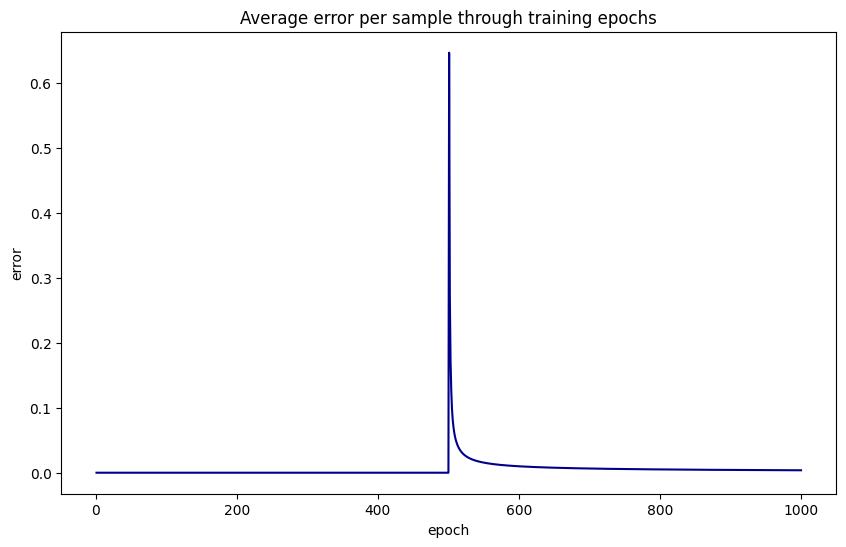

In [29]:
# network with 2 layers
net_tan = Network()
net_tan.add(FCLayer(13, 10))  
net_tan.add(ActivationLayer(tanh, tanh_prime))
net_tan.add(FCLayer(10,3))  
net_tan.add(ActivationLayer(softmax, softmax_prime))

# train
net_tan.use(categorical_cross_entropy, categorical_cross_entropy_prime)

err_vect_tan = net_tan.fit(X_train_standardized, y_train, epochs=500, learning_rate=0.1)
net_tan.plot_error_curve(err_vect_tan)

##################################################
Accuracy on train:  1.0
Accuracy on test:  0.9722222222222222
##################################################
Recall on train:  1.0
Recall on test:  0.9722222222222222
##################################################
Precision on train:  1.0
Precision on test:  0.9722222222222222
##################################################


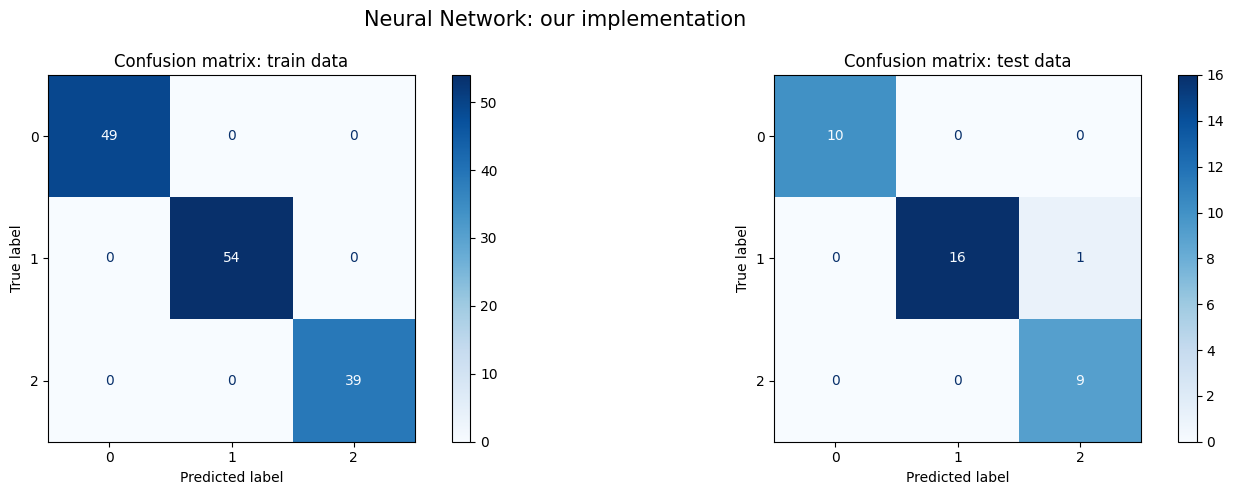

In [30]:
net_tan.nn_evaluate_one_hot(x_train= X_train_standardized, y_train=y_train, x_test=X_test_standardized, y_test=y_test, epochs=500, learning_rate=0.1)

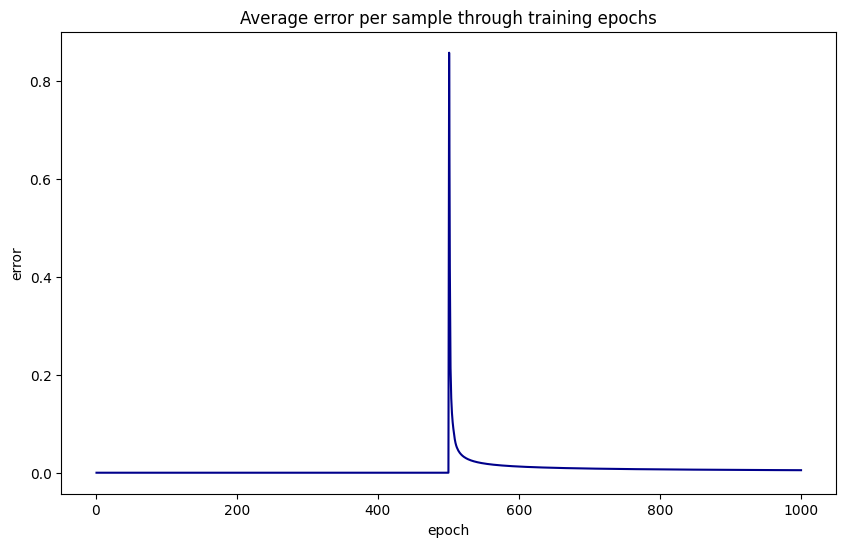

In [31]:
# network with 3 layers
net_tan= Network()
net_tan.add(FCLayer(13, 8))  
net_tan.add(ActivationLayer(tanh, tanh_prime))
net_tan.add(FCLayer(8,5))  
net_tan.add(ActivationLayer(tanh, tanh_prime))
net_tan.add(FCLayer(5, 3))  
net_tan.add(ActivationLayer(softmax, softmax_prime))

# train
net_tan.use(categorical_cross_entropy, categorical_cross_entropy_prime)

err_vect_tan = net_tan.fit(X_train_standardized, y_train, epochs=500, learning_rate=0.1)
net_tan.plot_error_curve(err_vect_tan)

##################################################
Accuracy on train:  1.0
Accuracy on test:  1.0
##################################################
Recall on train:  1.0
Recall on test:  1.0
##################################################
Precision on train:  1.0
Precision on test:  1.0
##################################################


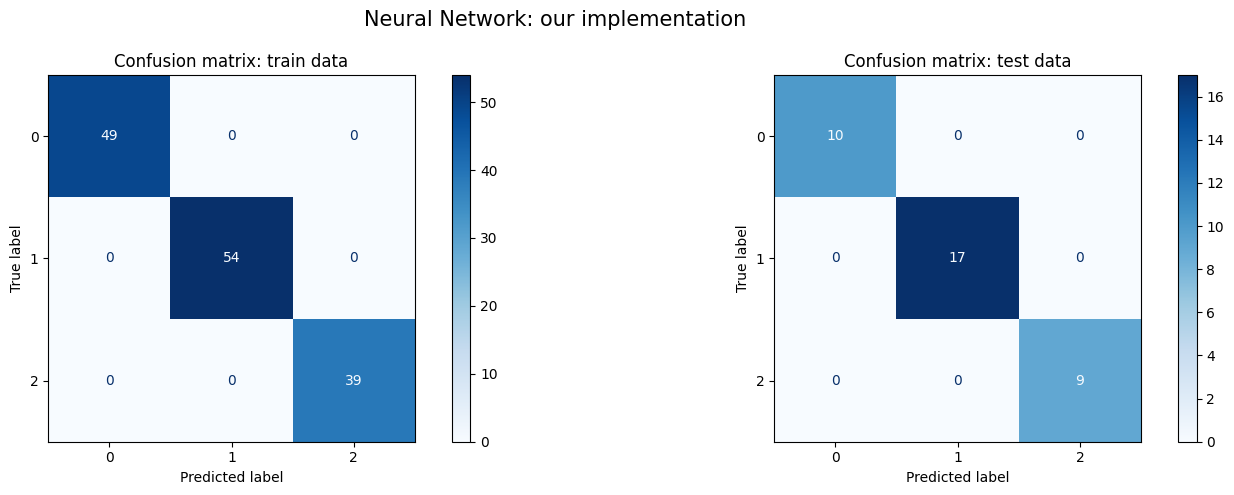

In [32]:
net_tan.nn_evaluate_one_hot(x_train= X_train_standardized, y_train=y_train, x_test=X_test_standardized, y_test=y_test, epochs=500, learning_rate=0.1)

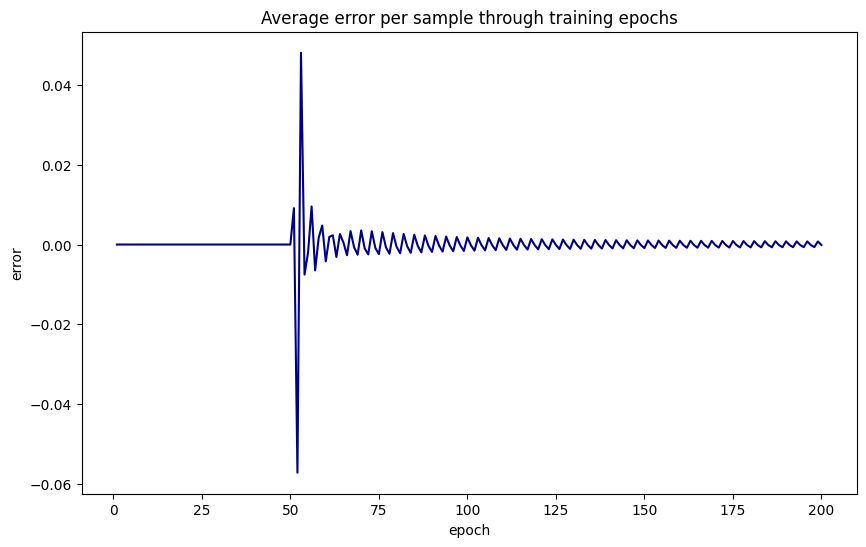

In [40]:
# network with 4 layers
net_tan = Network()
net_tan.add(FCLayer(13, 11))  
net_tan.add(ActivationLayer(tanh, tanh_prime))
net_tan.add(FCLayer(11,9))  
net_tan.add(ActivationLayer(tanh, tanh_prime))
net_tan.add(FCLayer(9,6))  
net_tan.add(ActivationLayer(tanh, tanh_prime))
net_tan.add(FCLayer(9, 3))  
net_tan.add(ActivationLayer(softmax, softmax_prime))

# train
net_tan.use(categorical_cross_entropy_prime, categorical_cross_entropy_prime)

err_vect_tan = net_tan.fit(X_train_standardized, y_train, epochs=50, learning_rate=0.1)
net_tan.plot_error_curve(err_vect_tan)


##################################################
Accuracy on train:  1.0
Accuracy on test:  0.9722222222222222
##################################################
Recall on train:  1.0
Recall on test:  0.9722222222222222
##################################################
Precision on train:  1.0
Precision on test:  0.9722222222222222
##################################################


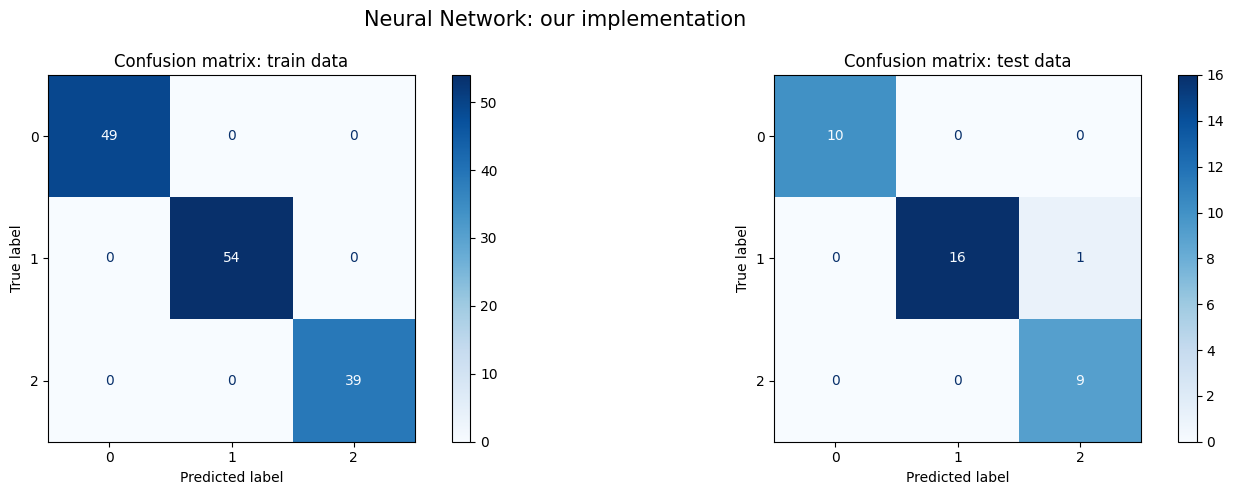

In [39]:
net_tan.nn_evaluate_one_hot(x_train= X_train_standardized, y_train=y_train, x_test=X_test_standardized, y_test=y_test, epochs=500, learning_rate=0.1)

#### Neural Network with relu activation in the hidden layers and softmax  in the outer layer


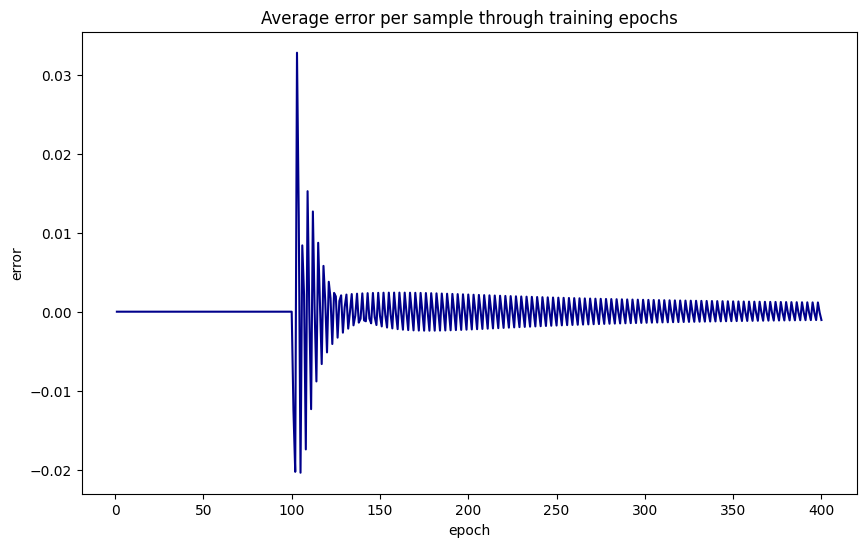

In [66]:
#network with 2 layers
net_soft = Network()
net_soft.add(FCLayer(13, 8))  
net_soft.add(ActivationLayer(tanh, tanh_prime))
net_soft.add(FCLayer(8, 3))  
net_soft.add(ActivationLayer(softmax, softmax_prime))

# train
net_soft.use(categorical_cross_entropy_prime, categorical_cross_entropy_prime)

err_vect_soft = net_soft.fit(X_train, y_train, epochs = 100,learning_rate=0.1)
net_soft.plot_error_curve(err_vect_soft)

##################################################
Accuracy on train:  1.0
Accuracy on test:  0.9444444444444444
##################################################
Recall on train:  1.0
Recall on test:  0.9444444444444444
##################################################
Precision on train:  1.0
Precision on test:  0.9444444444444444
##################################################


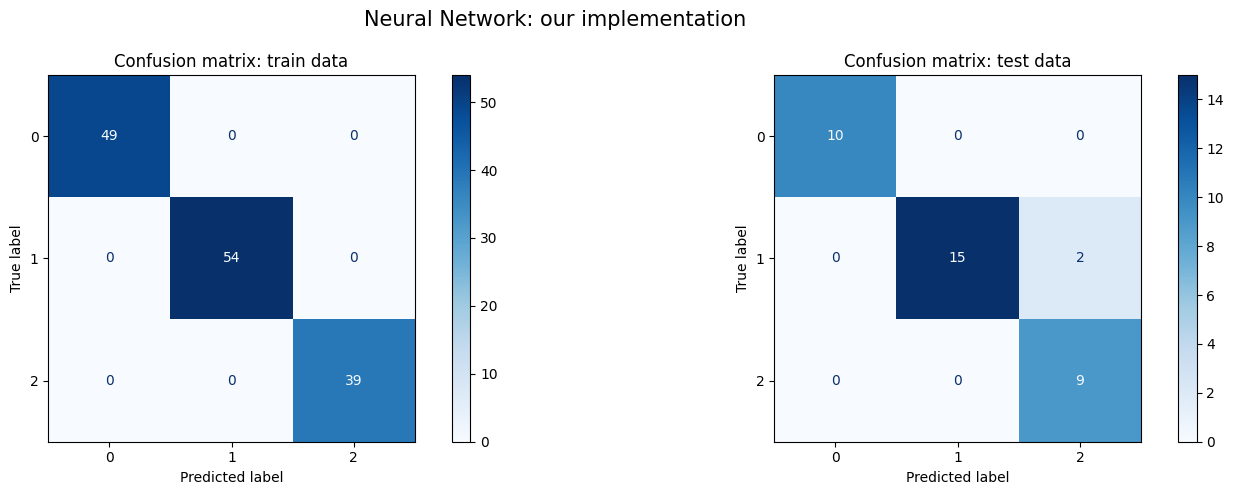

In [63]:
net_soft.nn_evaluate_one_hot(x_train= X_train, y_train=y_train, x_test=X_test, y_test=y_test, epochs=1000, learning_rate=0.1)

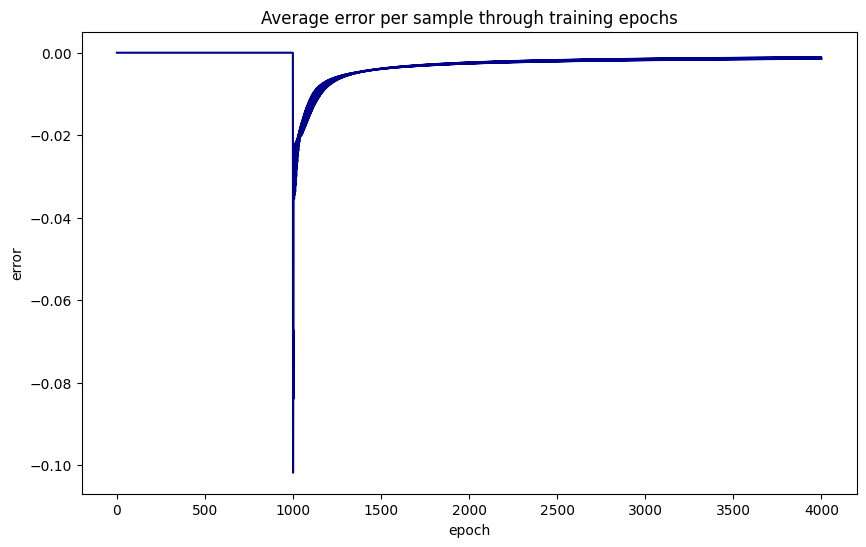

In [67]:
#network with 3 layers
net_soft = Network()
net_soft.add(FCLayer(13, 8))  
net_soft.add(ActivationLayer(tanh, tanh_prime))
net_soft.add(FCLayer(8, 3))  
net_soft.add(ActivationLayer(tanh, tanh_prime))

# train
net_soft.use(categorical_cross_entropy_prime, categorical_cross_entropy_prime)

err_vect_soft = net_soft.fit(X_train, y_train, epochs=1000, learning_rate=0.1)
net_soft.plot_error_curve(err_vect_soft)

##################################################
Accuracy on train:  1.0
Accuracy on test:  0.9444444444444444
##################################################
Recall on train:  1.0
Recall on test:  0.9444444444444444
##################################################
Precision on train:  1.0
Precision on test:  0.9444444444444444
##################################################


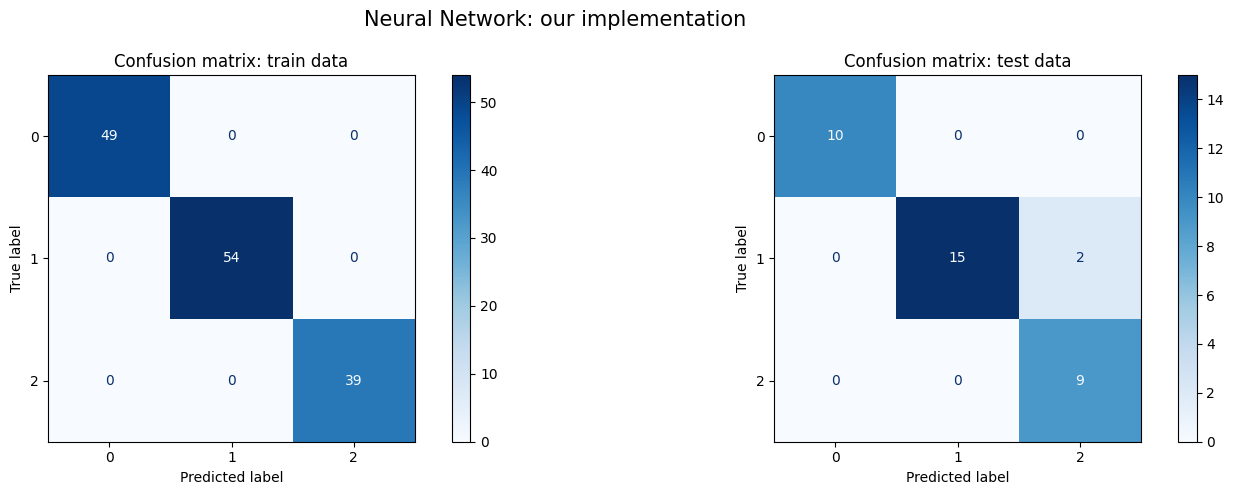

In [65]:
net_soft.nn_evaluate_one_hot(x_train= X_train, y_train=y_train, x_test=X_test, y_test=y_test, epochs=1000, learning_rate=0.1)

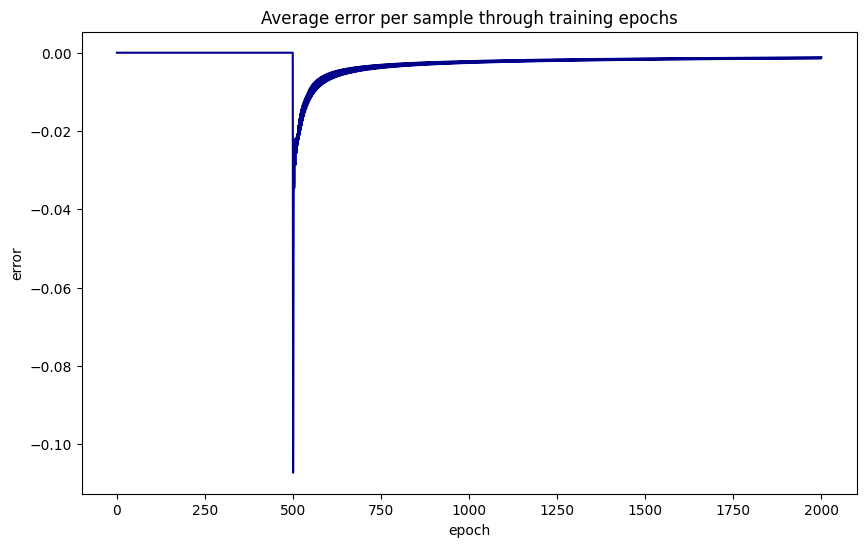

In [73]:
#network with 4 layers
net_soft = Network()
net_soft.add(FCLayer(13, 11))  
net_soft.add(ActivationLayer(tanh, tanh_prime))
net_soft.add(FCLayer(11, 9))  
net_soft.add(ActivationLayer(tanh, tanh_prime))
net_soft.add(FCLayer(9, 6))  
net_soft.add(ActivationLayer(tanh, tanh_prime))
net_soft.add(FCLayer(6, 3))  
net_soft.add(ActivationLayer(tanh, tanh_prime))

# train
net_soft.use(categorical_cross_entropy_prime, categorical_cross_entropy_prime)

err_vect_soft = net_soft.fit(X_train, y_train, epochs=500, learning_rate=0.1)
net_soft.plot_error_curve(err_vect_soft)

##################################################
Accuracy on train:  1.0
Accuracy on test:  0.9444444444444444
##################################################
Recall on train:  1.0
Recall on test:  0.9444444444444444
##################################################
Precision on train:  1.0
Precision on test:  0.9444444444444444
##################################################


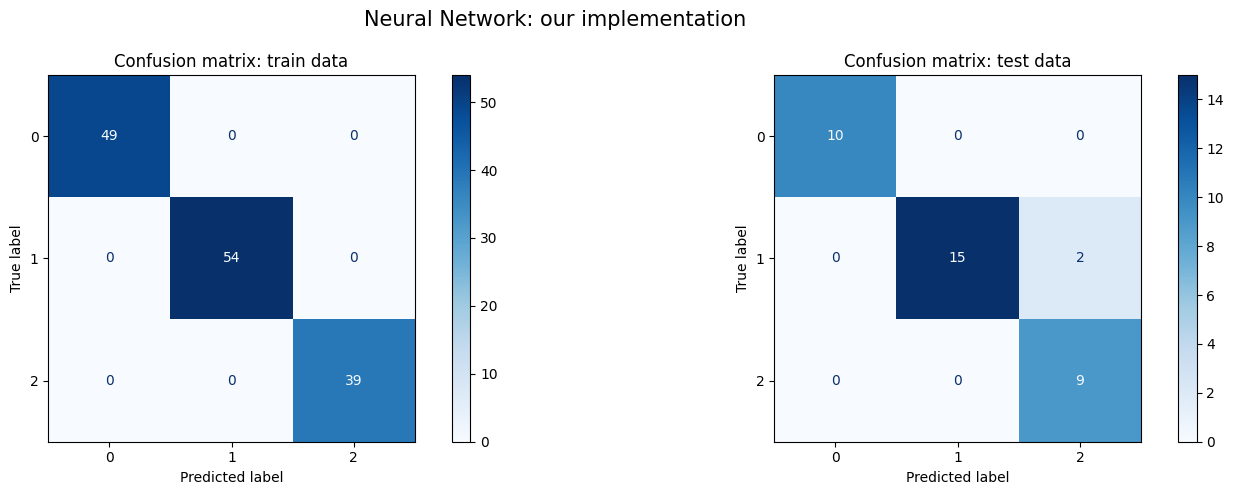

In [75]:
net_soft.nn_evaluate_one_hot(x_train= X_train, y_train=y_train, x_test=X_test, y_test=y_test, epochs=1000, learning_rate=0.1)

#### Cross validation to find the best number of nodes,layers and activation layer

In [96]:
node_numbers = [30,25,20,15,11,9,7,5]
layer_numbers = [2,3,4]
activation_functions = ['tanh', 'softmax']
input_size = 13
output_size = 3


In [83]:
import itertools
from sklearn.model_selection import KFold

In [97]:


# Initialize variables to store the best hyperparameters and performance
best_accuracy = 0
best_nodes = None
best_layers = None
best_activation = None

# Perform cross-validation for each hyperparameter combination
for nodes, layers, activation in itertools.product(node_numbers, layer_numbers, activation_functions):
    # Initialize an array to store the performance metrics for each fold
    accuracy_scores = []

    # Create a KFold instance
    kf = KFold(n_splits=5, shuffle=True)

    # Iterate over the folds
    for train_index, val_index in kf.split(X_train):
        # Split the data into training and validation sets
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        # Initialize and train your neural network with the current hyperparameters
        net = Network()
    
        net.add(FCLayer(input_size, nodes))
        net.add(ActivationLayer(tanh, tanh_prime))
        for _ in range(layers - 1):
            net.add(FCLayer(nodes, nodes))
            net.add(ActivationLayer(tanh, tanh_prime))
        net.add(FCLayer(nodes, output_size))
        if activation == 'tanh':
            net.add(ActivationLayer(tanh, tanh_prime))
            net.use(categorical_cross_entropy_prime, categorical_cross_entropy)
        else:
            net.add(ActivationLayer(softmax, softmax_prime))
            net.use(categorical_cross_entropy_prime, categorical_cross_entropy)

        # Train the network
        net.fit(X_train_fold, y_train_fold, epochs=100, learning_rate=0.1)

        y_val_pred = net.predict(X_val_fold)
        y_val_pred = np.concatenate(y_val_pred)

        # Convert one-hot encoded predictions back to class labels
        y_val_pred_labels = np.argmax(y_val_pred, axis=1)
        y_val_labels = np.argmax(y_val_fold, axis=1)

        # Convert one-hot encoded true labels back to class labels
        y_val_labels = np.argmax(y_val_fold, axis=1)


        accuracy = accuracy_score(y_true=y_val_labels, y_pred=y_val_pred_labels)
        accuracy_scores.append(accuracy)

    # Calculate the average accuracy across all folds
    average_accuracy = np.mean(accuracy_scores)

    # Update the best hyperparameters if the current combination performs better
    if average_accuracy > best_accuracy:
        best_accuracy = average_accuracy
        best_nodes = nodes
        best_layers = layers
        best_activation = activation

# Print the best hyperparameters and performance
print("Best Nodes:", best_nodes)
print("Best Layers:", best_layers)
print("Best Activation Function:", best_activation)
print("Best Accuracy:", best_accuracy)


Best Nodes: 30
Best Layers: 2
Best Activation Function: softmax
Best Accuracy: 0.5004926108374385
